**Display sudoku table with Persian numbers:**

Just use the persiantools library to convert Persian numbers, then look at the numbers on a sudoku table

In [84]:
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
from persiantools import digits
import numpy
import pandas

Install <b>persiantools</b>

In [ ]:
!pip install persiantools

Reading default empty sudoku grid and required font

In [92]:

#This file is a solved sudoku table, which we use only the first solved sudoku to display what we want.
df = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Sudoku/sudoku.csv')
Q = df.values[10][0]
S = df.values[10][1]

question = []
solve = []
for q in Q: question.append(numpy.int(q))
for s in S: solve.append(numpy.int(s))

<ipython-input-92-9af0cb001fcd>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for q in Q: question.append(numpy.int(q))
<ipython-input-92-9af0cb001fcd>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20

Printing sudoku question on the grid

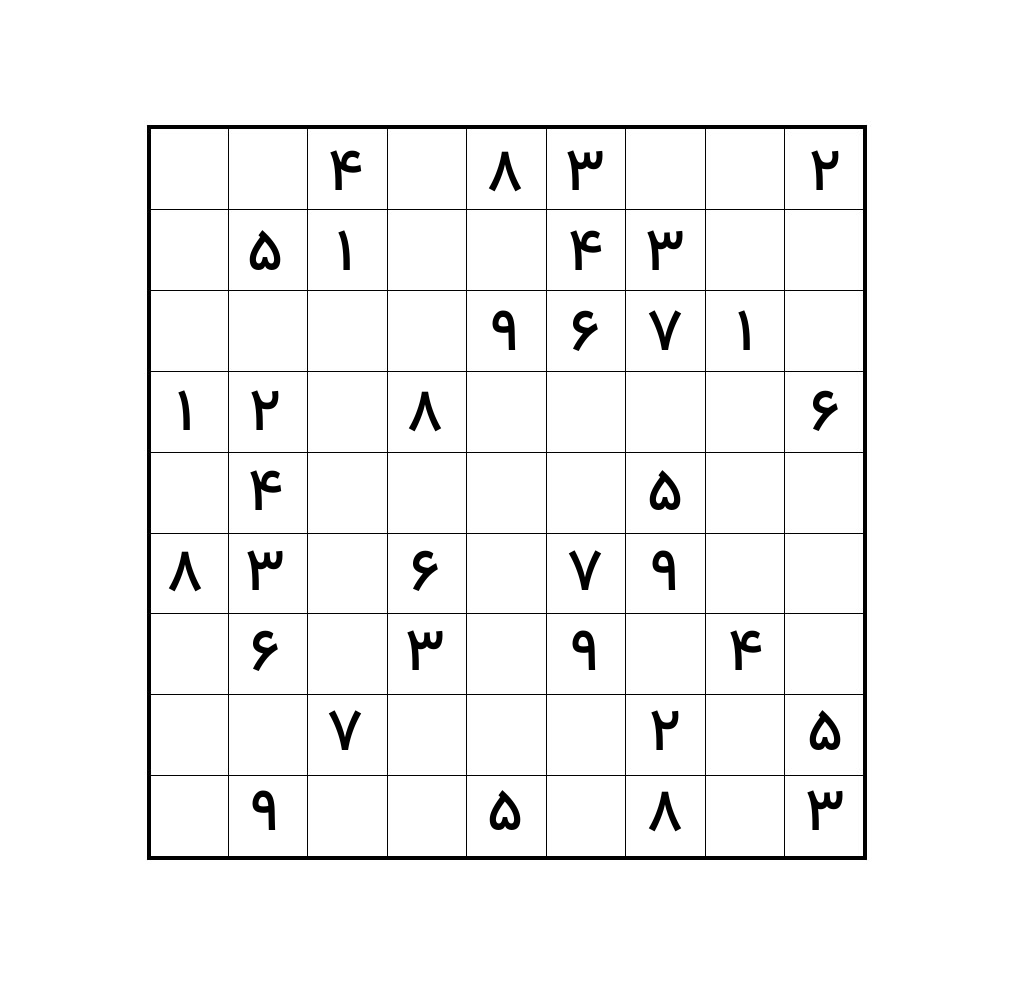

In [104]:
out_img = Image.open('/content/drive/MyDrive/Colab Notebooks/Sudoku/SudokuGrid.jpg')

font_ = ImageFont.truetype(font = '/content/drive/MyDrive/Colab Notebooks/Sudoku/Vazirmatn-Medium.ttf',size= 60)

draw = ImageDraw.Draw(out_img)

question = numpy.asarray(question).reshape([9,9])
horizental_offset = 185
vertical_offset = 175
step = 80
for i in range(9):

  for j in range(9):

    if question[i,j]!= 0:
      draw.text(xy = (horizental_offset + j*step,vertical_offset + i*step),
                text = digits.en_to_fa(str(question[i,j])),
                fill="Black",
                stroke_fill="Gold",
                #stroke_width=10,
                font=font_,
                direction="ltr",
                language='fa',
                anchor ='mm',
                Literal='center',
                align='right')

# Step 5: Save output in Generated-Image path
out_img.save('question.png')

out_img


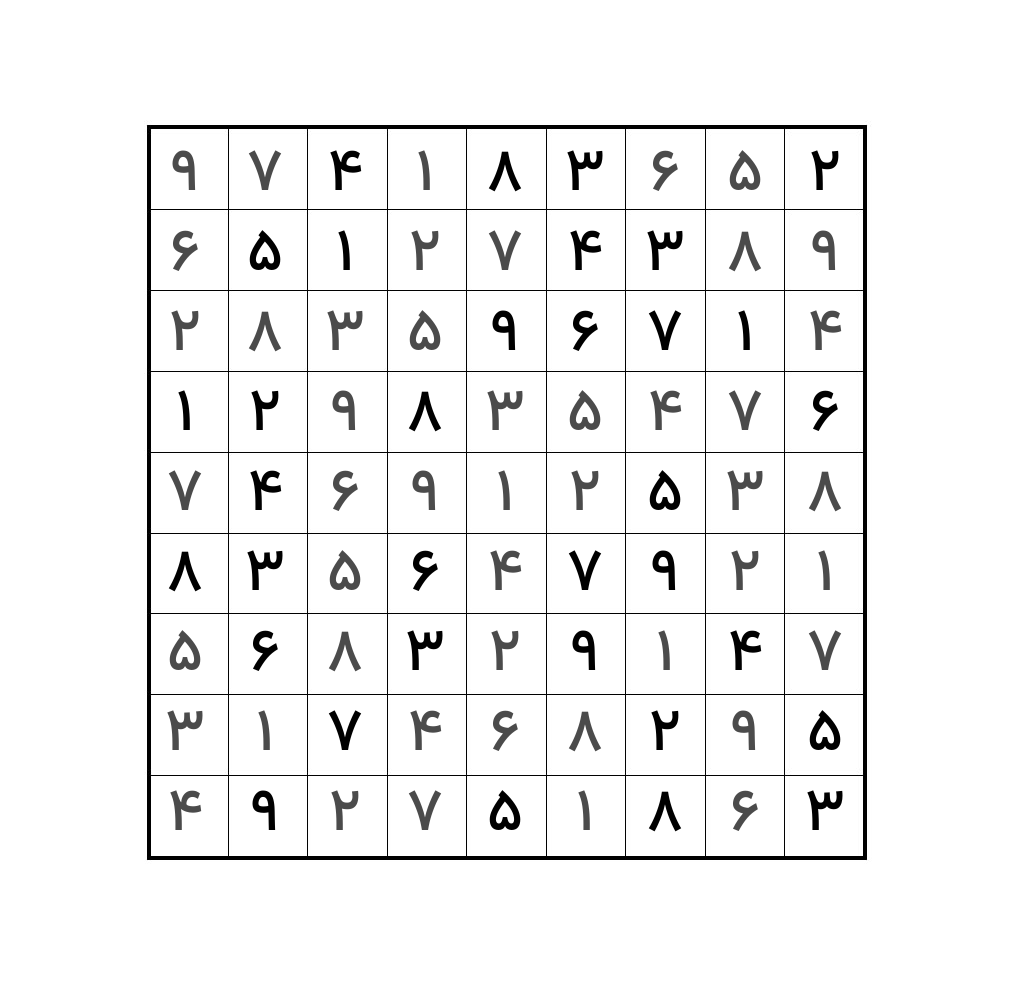

In [111]:
solve_img = Image.open('/content/drive/MyDrive/Colab Notebooks/Sudoku/SudokuGrid.jpg')

font_ = ImageFont.truetype(font = '/content/drive/MyDrive/Colab Notebooks/Sudoku/Vazirmatn-Medium.ttf',size= 60)

draw_solve = ImageDraw.Draw(solve_img)

solve = numpy.asarray(solve).reshape([9,9])

horizental_offset = 185
vertical_offset = 175
step = 80
for i in range(9):

  for j in range(9):

    if solve[i,j]!= 0:
      fill_color = 'Black'
      if question[i,j] != solve[i,j]: fill_color = 'Green'

      draw_solve.text(xy = (horizental_offset + j*step, vertical_offset + i*step),
                text = digits.en_to_fa(str(solve[i,j])),
                fill=fill_color,
                #stroke_fill="Gold",
                #stroke_width=10,
                font=font_,
                #direction="ltr",
                language='fa',
                anchor ='mm',
                Literal='center',
                align='right')


# Step 5: Save output in Generated-Image path
solve_img.save('solve.png')

solve_img